# CAP4630 Assignment 1

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from mpl_toolkits import mplot3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Linear Regression with Gradient Descent

In [0]:
np.random.seed(42)

# Using 2 independent variables
x1 = 2 * np.random.rand(200, 1)
x2 = 2 * np.random.rand(200, 1)

# Creating our equation to estimate
ys = 4 + 7 * x1 + 5 * x2 + np.random.rand(200, 1)

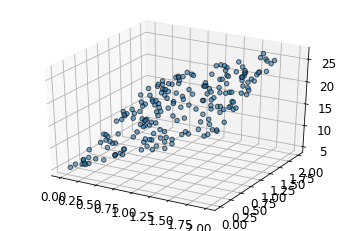

In [22]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, ys, cmap='viridis', edgecolor='none', alpha=0.6)
plt.show()

In [0]:
# split the data into training and test sets
# train set
train_x1 = x1[:160]
train_x2 = x2[:160]
train_ys = ys[:160]

# test set
test_x1 = x1[160:]
test_x2 = x2[160:]
test_ys = ys[160:]


In [0]:
# number of epochs
epochs = 1000
# learning rate
lr = 0.01

In [0]:
# initial value for weights w_1, w_2 and bias b
w1 = np.random.randn(1)
w2 = np.random.randn(1)

b = np.zeros(1)

In [0]:
# Performing gradient descent 
for epoch in range(epochs):
  for i in range(160):
    # Generate prediction
    y_pred = w1 * train_x1[i] + w2 * train_x2[i] + b
    
    # Calculate gradients
    grad_w1 = (y_pred - train_ys[i]) * train_x1[i]
    grad_w2 = (y_pred - train_ys[i]) * train_x2[i]
    grad_b = (y_pred - train_ys[i])
    
    # Update weights
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
    b -= lr * grad_b

In [0]:
# Test weights on test set and calculate a loss
test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w1 * test_x1[i] + w2 * test_x2[i] + b - test_ys[i]) ** 2
test_loss /= 20

In [28]:
# Calculated test loss
test_loss

array([0.03811216])

In [0]:
# Generate predictions on test set
pred_ys = w1 * test_x1 + w2 * test_x2 + b

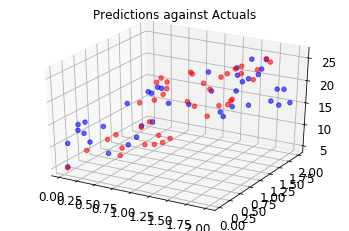

In [30]:
# Plot predictions against actuals
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_x2, test_x2, test_ys, color='blue', alpha=0.6)
ax.scatter(test_x1, test_x2, pred_ys, color='red', alpha=0.6)
ax.set_title('Predictions against Actuals')
plt.show()

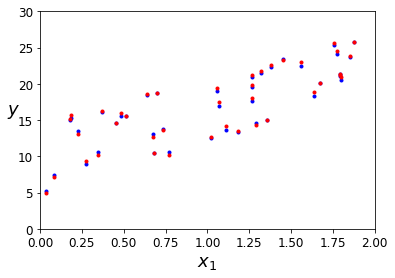

In [31]:
# View from X1 plane
plt.plot(test_x1, test_ys, "b.")
plt.plot(test_x1, pred_ys, "r.") # predicted values
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 30])
plt.show()

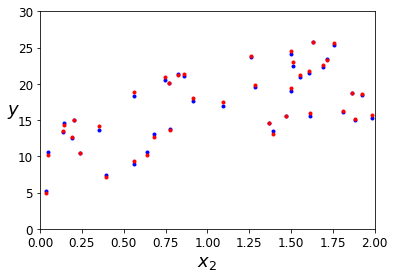

In [32]:
# View from X2 plane
plt.plot(test_x2, test_ys, "b.")
plt.plot(test_x2, pred_ys, "r.") # predicted values
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 30])
plt.show()

In [33]:
# Should be close to 4
b

array([4.56576445])

In [34]:
# Should be close to 7
w1

array([7.01043328])

In [35]:
# Should be close to 5
w2

array([4.97591681])